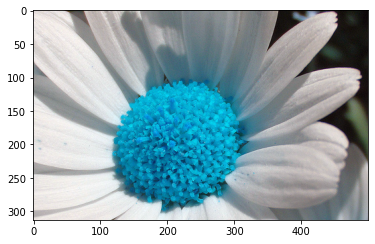

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#讀取資料夾圖片
DATADIR = 'D:/Deep Learning/Deep Learning/flowers'
CATEGORIES = ['daisy','dandelion','rose','sunflower','tulip']

for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)#顏色莫認為BGR，需轉為RGB
            plt.imshow(img_array)
            plt.show()
            break
        break    

<function matplotlib.pyplot.show(close=None, block=None)>

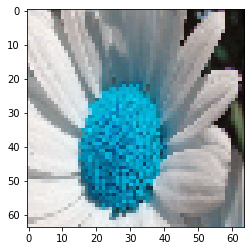

In [2]:
#固定所有圖片大小
IMG_SIZE = 64
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show

In [3]:
#讀取固定大小後的資料夾圖片

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)#顏色莫認為BGR，需轉為RGB
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
    

In [4]:
print(len(training_data))

4316


In [5]:
import random

random.shuffle(training_data) #將資料隨機排序

In [7]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X,dtype='float32')
y = np.array(y, dtype = 'int32')




In [8]:
import pickle
#儲存資料
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()


pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()




In [9]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


import pickle
#使用 "load()" 讀取儲存好的 pickle 資料。
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X = X/255.0 #標準化
X.shape

(4316, 64, 64, 3)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)  #分割訓練集、驗證集,80%訓練，20%驗證

In [11]:
input_shape = (64,64,3) #圖片大小64*64*3(RGB)


model = Sequential([
#建立第1層卷積層，透過濾鏡產生64個影像特徵
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
#加入Dropout層，避免overfitting
    Dropout(0.2),
#建立第2層卷積層，透過濾鏡產生128個影像特徵  
    Conv2D(128, (3, 3),padding='same',
           activation='relu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
#加入Dropout層，避免overfitting    
    Dropout(0.2),


#建立平坦層
    Flatten(),
#加入Dropout層，避免overfitting      
    Dropout(0.5),
    Dense(5, activation='softmax') #有5個分類，分類用softmax
])
model.compile(optimizer = 'adam',#最佳化方法
              loss = 'sparse_categorical_crossentropy',#損失函數
              metrics=['accuracy']) #評估方式:準確度

#訓練模型
history=model.fit(X_train, y_train ,validation_data=(X_validation,y_validation),   
        batch_size=64,
        epochs=50,
    
        ) 

Epoch 1/50
54/54 [==============================] - 4s 62ms/step - loss: 1.4517 - accuracy: 0.3441 - val_loss: 1.2459 - val_accuracy: 0.4248
Epoch 2/50
54/54 [==============================] - 3s 60ms/step - loss: 1.2125 - accuracy: 0.4832 - val_loss: 1.0977 - val_accuracy: 0.5312
Epoch 3/50
54/54 [==============================] - 3s 62ms/step - loss: 1.1331 - accuracy: 0.5240 - val_loss: 1.0612 - val_accuracy: 0.5451
Epoch 4/50
54/54 [==============================] - 4s 73ms/step - loss: 1.0581 - accuracy: 0.5724 - val_loss: 1.0096 - val_accuracy: 0.5914
Epoch 5/50
54/54 [==============================] - 4s 79ms/step - loss: 1.0140 - accuracy: 0.5930 - val_loss: 1.0134 - val_accuracy: 0.6088
Epoch 6/50
54/54 [==============================] - 4s 77ms/step - loss: 0.9841 - accuracy: 0.6138 - val_loss: 0.9487 - val_accuracy: 0.6389
Epoch 7/50
54/54 [==============================] - 4s 74ms/step - loss: 0.9504 - accuracy: 0.6266 - val_loss: 0.9422 - val_accuracy: 0.6204
Epoch 8/50
54

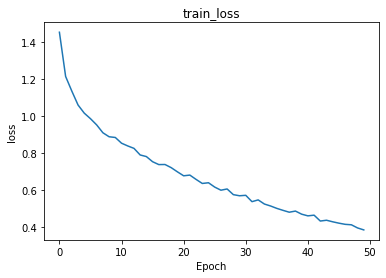

In [12]:
#模型概況
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#下圖顯示誤差隨著訓練次數降低

In [13]:
#預測
predictions = model.predict(X_validation)
y_pre = np.argmax(predictions, axis = 1) #取最高機率


In [14]:
from sklearn.metrics import confusion_matrix
#混淆矩陣
CM = confusion_matrix(y_validation, y_pre)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
clf_matrics = confusion_matrix(y_validation,y_pre)
print(accuracy(CM))
clf_matrics

0.7256944444444444


array([[108,  29,   5,   6,   2],
       [ 14, 169,   4,  12,   5],
       [ 15,  12,  94,   1,  33],
       [  7,  18,   2, 113,   6],
       [ 18,  16,  27,   5, 143]], dtype=int64)

In [15]:
from sklearn.metrics import precision_recall_fscore_support
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_validation, y_pre))#準確率
print("Precision:",metrics.precision_score(y_validation,y_pre,average=None))#精準度
print("Recall:",metrics.recall_score(y_validation,y_pre,average=None))#召回率
print("F1_score:",metrics.f1_score(y_validation,y_pre,average=None))#F1-score 

Accuracy: 0.7256944444444444
Precision: [0.66666667 0.69262295 0.71212121 0.82481752 0.75661376]
Recall: [0.72       0.82843137 0.60645161 0.7739726  0.68421053]
F1_score: [0.69230769 0.75446429 0.65505226 0.79858657 0.71859296]


In [16]:
#印出測試集隨機十筆預測後的結果和正解
print(y_pre[:10])           #預測
print(y_validation[:10])    #正解

[4 2 3 4 1 3 1 0 1 2]
[4 4 3 2 1 3 1 0 1 2]


In [17]:
#存模型
from keras.models import load_model
model.save("72.5%_model")


INFO:tensorflow:Assets written to: 71.5%_model\assets
